importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

loading data

In [2]:
sales_data = pd.read_csv("Sales_add.csv")
sales_data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


Descriptive analysis and null value check

In [3]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [4]:
sales_data.isnull().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

In [5]:
sales_data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


There are 22 rows, 5 columns and NO missing value

Casestudy by the company

Checking for Outliers in Data

[Text(0.5, 1.0, 'Sales After digital add(in $)')]

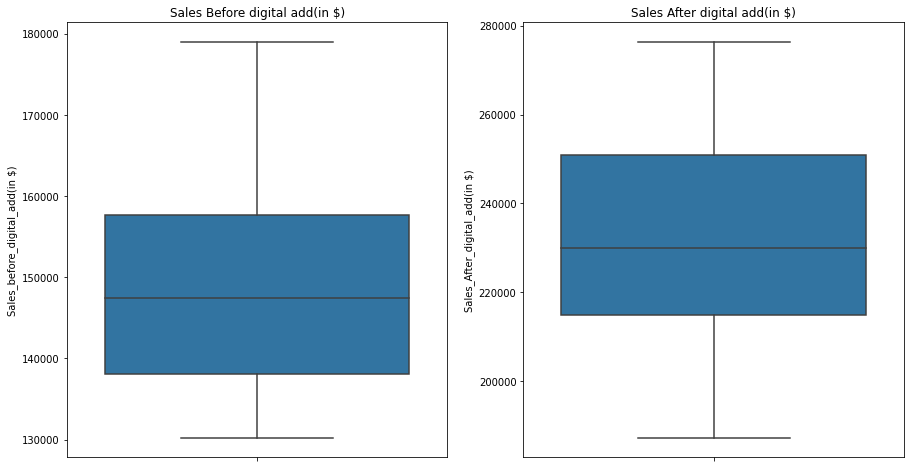

In [6]:
fig, (ax0,ax1) = plt.subplots(figsize = (15,8), nrows = 1, ncols = 2)

# Plotting and customizing the axes
sns.boxplot( y = "Sales_before_digital_add(in $)" , data = sales_data, ax = ax0)
ax0.set(title = "Sales Before digital add(in $)")
sns.boxplot( y = "Sales_After_digital_add(in $)" , data = sales_data, ax = ax1);
ax1.set(title = "Sales After digital add(in $)")

No outliers present

Case 1 : Whether there is any increase in sales after stepping into digital marketing.

This can be done as follows:-
STEP 1

We'll define the Null and Alternate Hypothesis. and set the Significance level.

Null Hypothesis :
Ho : Sales After Digital Advertising will be less than or equal to the sales before Digital Advertising.

Alternate Hypothesis :
Ha : Sales After Digital Advertising will be Greater than the sales before usage of Digital Advertising.

The Confidence level for this test will be 95% & we'll set the level of Significance as alpha = 0.05.
STEP 2

Next we'll calculate the T-score and p value .

In [8]:
# Extracting required features from Dataset and creating new variables.

sales_before = sales_data[["Sales_before_digital_add(in $)"]]

sales_after = sales_data[["Sales_After_digital_add(in $)"]]

#  Conducting a 2 sample 1 tail T test:

t_score, p = stats.ttest_rel(sales_after, sales_before, alternative="greater")
print("The Test statistic scores are : \nt-score = %0.3f , p-value = %0.3f \n" % (t_score, p) )

The Test statistic scores are : 
t-score = 12.091 , p-value = 0.000 



In [9]:
t_critical = 1.721 # t value for dof = 21 & alpha = 0.05

if t_score > t_critical:
    print("\nWe'll reject the Null Hypothesis\n\n")
elif t_score <= t_critical:
    print("\nWe fail to reject the Null Hypothesis\n")


We'll reject the Null Hypothesis




Step 4 - CONCLUSION - We can say that there is a significant increase in sales after doing Digital advertisements.

Case 2 : Checking whether there is any dependency between the features “Region” and “Manager”

STEP 1

We'll define the Null and Alternate Hypothesis. and set the Significance level.

Assuming that:

Null Hypothesis :
Ho : There is NO significant dependency between the Region and the Manager features.

Alternate Hypothesis :
Ha : There is a significant amount of dependency between the Region and the Manager features.

The Confidence level for this test will be 95% & we'll set the level of Significance as alpha = 0.05.

In [10]:
# Extracting the Required Features, performing a crosstab on them and assigning it to a new variable
data_crosstab = pd.crosstab(sales_data["Region"],sales_data["Manager"])
data_crosstab

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [11]:
stat, p, dof, expected = chi2_contingency(data_crosstab)

print(f"The Test chi-square value is :\t{stat:.3f}")
print(f"\nThe p-Value is :  \t{p:.3f}" )
print(f"\nThe Degree of freedom is : \t{dof}")

chi2_critical = 9.488 # the chi2 value at alpha = 0.05 and dof = 4

if stat > chi2_critical:
    print(f"We'll reject the Null Hypothesis")
elif stat < chi2_critical:
    print ("\n\nWe're unable to Reject the Null Hypothesis")

The Test chi-square value is :	3.051

The p-Value is :  	0.549

The Degree of freedom is : 	4


We're unable to Reject the Null Hypothesis


Step 4 - Conclusion- we can conclude that there is no significant relationship between the Region and Manager features.